In [40]:
import rayx
import matplotlib.pyplot as plt
import numpy as np

In [41]:
metrix = rayx.import_beamline('METRIX_U41_G1_H1_318eV_PS_MLearn_v114.rml')
metrix

In [42]:
source = metrix.sources[0]

In [43]:
element = metrix.elements[0]

In [44]:
element.material

<Material.Cu: 29>

In [45]:
metrix.sources[0].numberOfRays = 1000000

In [46]:
metrix.sources

In [47]:
metrix.elements

In [48]:
rays = metrix.trace()

In [49]:
pos_x = rays.position_x
pos_z = rays.position_z

last_element = rays.last_element_id

In [50]:
last_element

array([0, 0, 0, ..., 9, 9, 9], shape=(8305688,), dtype=int32)

In [51]:
def plot_histogram(xs, zs, ax, fig):
    hist, xedges, zedges = np.histogram2d(xs, zs, bins=100, density=True)
    extent = [xedges[0], xedges[-1], zedges[0], zedges[-1]]
    h = ax.imshow(hist.T, extent=extent, origin='lower', aspect='auto', cmap='viridis')
    fig.colorbar(h, ax=ax)
    #fig.colorbar(ax.images[0], ax=ax, orientation='vertical', label='Counts')

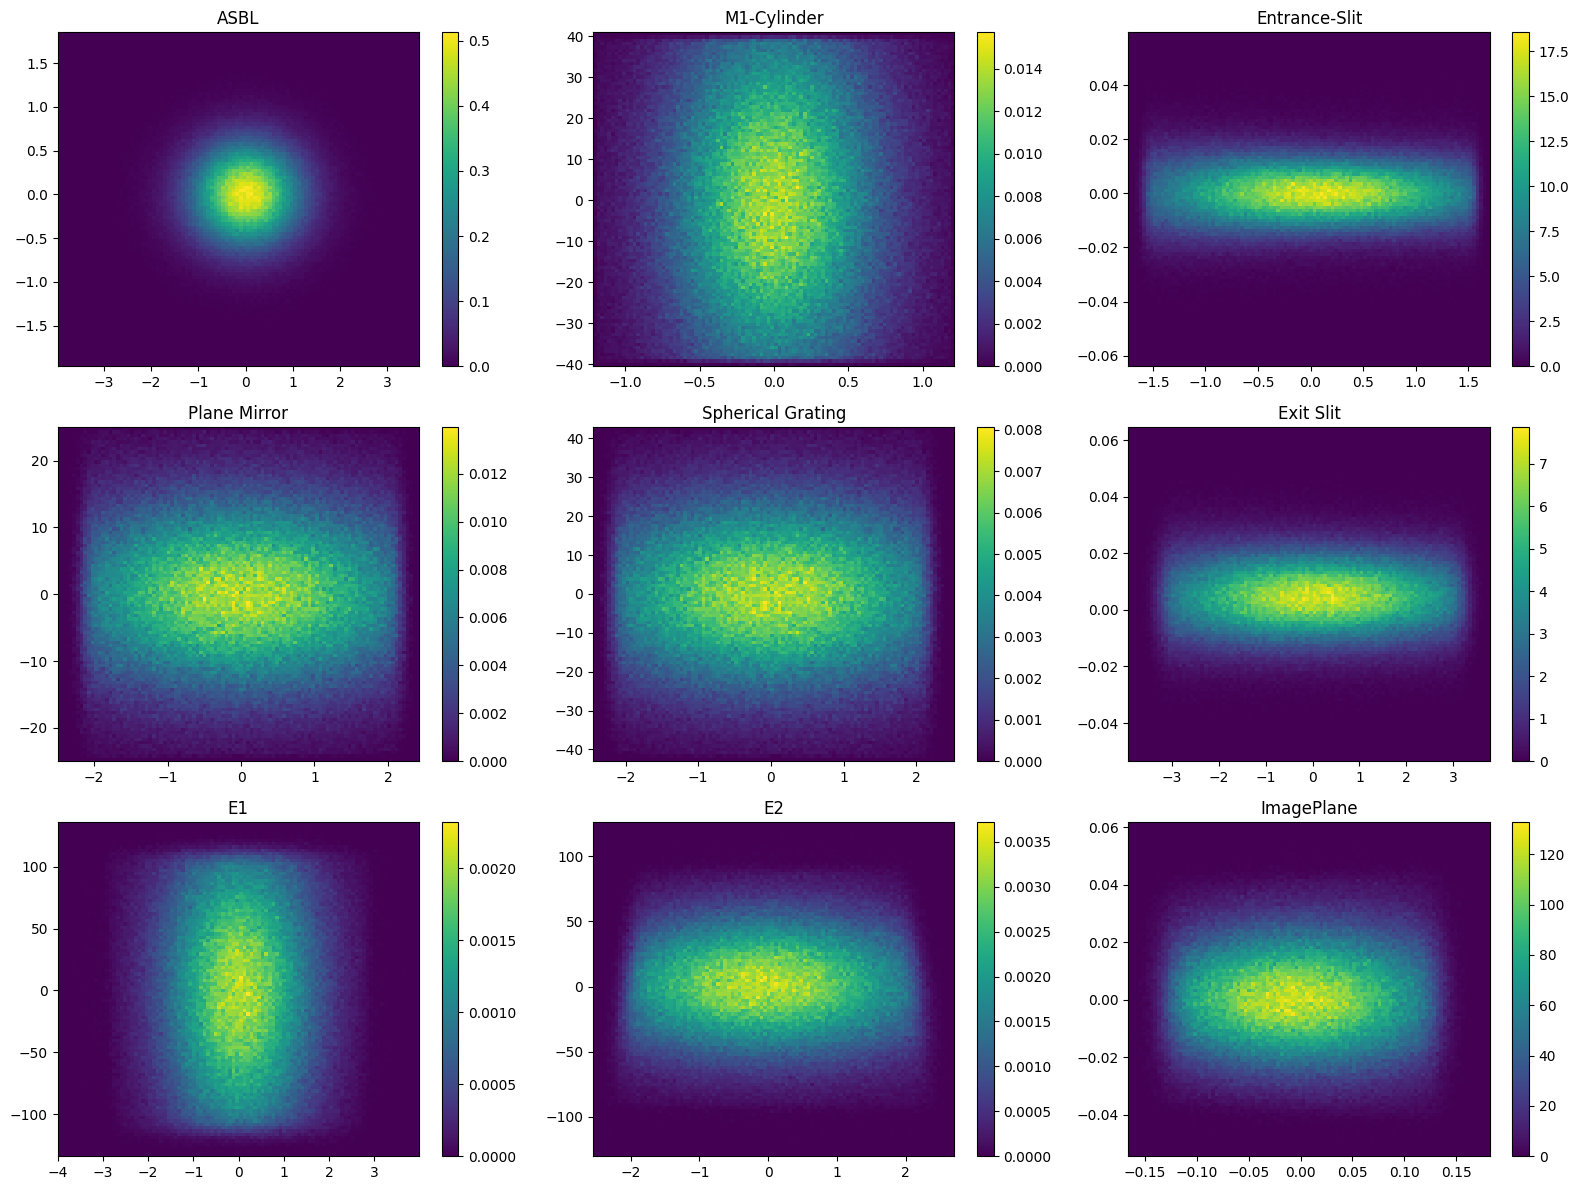

In [52]:
fig = plt.figure(figsize=(16, 12))

index = 0
for element in range(len(metrix.elements)):
    mask = last_element == element + 1
    ax = fig.add_subplot(3, 3, index + 1)
    plot_histogram(pos_x[mask], pos_z[mask], ax, fig)
    ax.set_title(f"{metrix.elements[element].name}")
    index += 1
fig.tight_layout()